<p style='text-align:center; font-size:250%; font-weight:bold'>K-NEAREST NEIGHBOUR</p>
<p style='text-align:center; font-size:150%'>Author: Andrean Yonathan</p>

# Import Library

In [1]:
import numpy as np
import pandas as pd

# library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# libray for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# library for modelling
from sklearn.neighbors import KNeighborsClassifier

# library for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [2]:
names = ["sepal-length","sepal-width","petal-length", "petal width","class"]
df = pd.read_csv('iris.data.csv', names = names)
df.head()

,sepal-length,sepal-width,petal-length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Understanding

## check data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## check missing values

In [4]:
df.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal width     0
class           0
dtype: int64

Data has no missing values

## check descriptive statistics

In [5]:
df.describe()

,sepal-length,sepal-width,petal-length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## check outliers

In [6]:
for col in df.columns[:-1]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outlier = ((df[col] < (q1 - iqr*1.5)) | (df[col] > (q3 + iqr*1.5))).sum()
    print(f'Columns {col} has {outlier} outlier')

Columns sepal-length has 0 outlier
Columns sepal-width has 4 outlier
Columns petal-length has 0 outlier
Columns petal width has 0 outlier


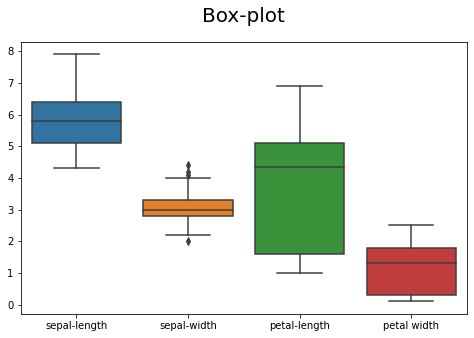

In [7]:
# box plot
plt.figure(figsize = (8,5))
plt.title('Box-plot', fontsize = 20, pad = 20)
sns.boxplot(data = df)
plt.show()

# DATA UNDERSTANDING REPORT

* The data type is correct.
* Data has no missing values.
* There are outlier in `sepal-width` feature and will be removed.

# Data Pre-processing

## remove outlier

Columns sepal-length has 0 outlier
Columns sepal-width has 0 outlier
Columns petal-length has 0 outlier
Columns petal width has 0 outlier




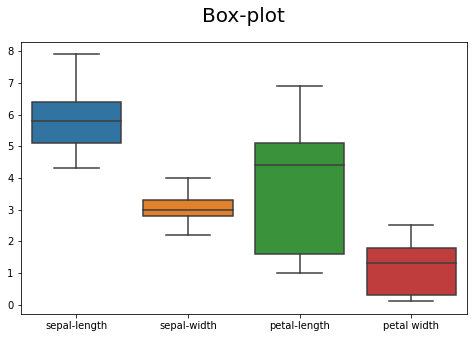

In [8]:
q1 = df['sepal-width'].quantile(0.25)
q3 = df['sepal-width'].quantile(0.75)
iqr = q3 - q1
df_outlier = df[((df['sepal-width'] < (q1 - iqr*1.5)) | (df['sepal-width'] > (q3 + iqr*1.5))) == True]

# replace dataset
df.drop(df_outlier.index, inplace = True)

# check outlier
for col in df.columns[:-1]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outlier = ((df[col] < (q1 - iqr*1.5)) | (df[col] > (q3 + iqr*1.5))).sum()
    print(f'Columns {col} has {outlier} outlier')
print('\n')

# box plot
plt.figure(figsize = (8,5))
plt.title('Box-plot', fontsize = 20, pad = 20)
sns.boxplot(data = df)
plt.show()

The outliers have removed

## Label Encoding

In [9]:
le = LabelEncoder()
le.fit(df['class'])
df['class'] = le.transform(df['class'])
classes = dict(zip(le.classes_, le.transform(le.classes_)))
print(classes)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


## Feature Selection

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X)
print(pca.explained_variance_ratio_)

[0.93042172 0.04694468]


PCA 1 is able to explain 93% of the data variance, so PCA 1 will be chosen for the classification process

In [11]:
pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)
print('{:.2%}'.format(pca.explained_variance_ratio_[0]))

93.04%


## Split Dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

## Scaling

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [14]:
model = KNeighborsClassifier(n_neighbors = 30)

# fit model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# Evaluation

In [15]:
# accuracy score
print('Accuracy score: {:.2%}'.format(accuracy_score(y_test, y_pred)))
print('\n')

# classification report
print('Classification report\n\n', classification_report(y_test, y_pred))

Accuracy score: 93.33%


Classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



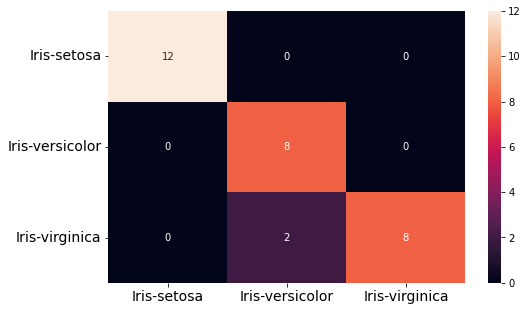

In [16]:
# confusion matrix

conf = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf, ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'))

# create heatmap
plt.figure(figsize = (8,5))
heatmap = sns.heatmap(conf_df, annot = True)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)
plt.show()

Text(0, 0.5, 'Mean Error')

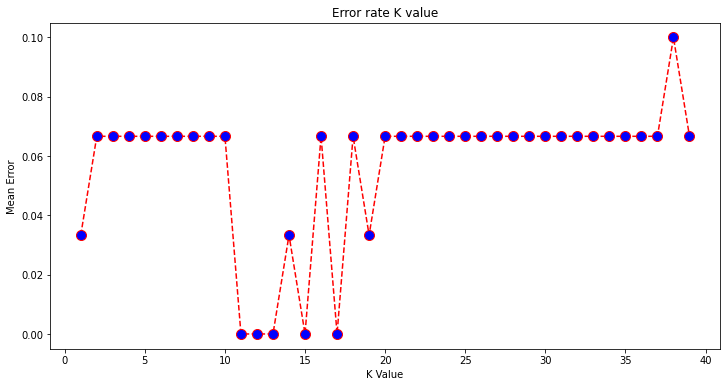

In [17]:
error = []

#Calculating error for K values between 1 and 40
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color="red", linestyle="dashed", marker="o",
        markerfacecolor="blue", markersize=10)
plt.title("Error rate K value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")